---
layout: default
title: "SVM - Large Margin Classification"
categories: SVM
permalink: /ML20/
order: 20
comments: true
---

In [25]:
%pylab --no-import-all inline
import sympy
matplotlib.rcParams['text.usetex'] = False

Populating the interactive namespace from numpy and matplotlib


# Large Margin Classification
At this point we have seen a number of learning algorithm. While it is true to a certain degree that different learning algorithms have similar performances and that the amount and quality of data is fundamental, we need to cover another class of learning algorithm that are often used in industry and academia, the **Support Vector Machines** (SVM). These algorithms can sometimes give a cleaner and more powerful way of learning complex non-linear functions.

## Optimization objective
Let's see how we can get to a support vector machine from a logistic regression algorithm.

In a classic logistic regression algorithm we have our hypothesis based on the sigmoid activation function

$$
h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}
$$

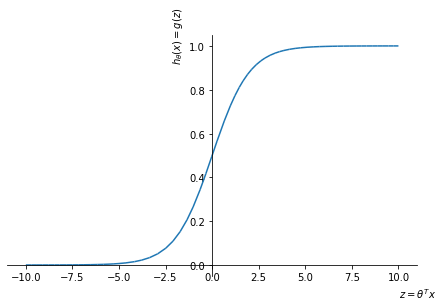

In [26]:
x = sympy.symbols('x')
logistic = lambda z: 1/(1+(np.e**(-z)))
p = sympy.plot(logistic(x), xlabel='$z = \\theta^Tx$', ylabel='$h_\\theta(x) = g(z)$')

In logistic regression:

* for $y=1$ we would like $h_\theta(x)\approx 1 \leftarrow \theta^T \gg 0$ 
* for $y=0$ we would like $h_\theta(x)\approx 0 \leftarrow \theta^T \ll 0$

Each examples contributes to the total cost computed by the cost function by the term:

$$
-y \log (h_\theta(x)) - (1-y) \cdot \log (1-h_\theta(x))
$$

That, when replacing the $h_\theta(x)$ term, becomes:

$$
\begin{equation}
\color{royalblue}{-y\log \left(\frac{1}{1+e^{-\theta^Tx}}\right)} - \color{darkgreen}{(1-y) \cdot \log \left(1-\frac{1}{1+e^{-\theta^Tx}} \right)}
\end{equation}
\label{eq:logcost} \tag{1}
$$

When $y=1$, the contribution to the cost function is given by the left factor in $\eqref{eq:logcost}$, a single example will have a very small contribution to the cost function for large values of $z$ (<a href="#costterms">Figure below</a>, panel A, blue line). To build a SVM, we will build a cost function such that its behavior will be like that of the orange line in panel A of <a href="#costterms">the Figure below</a>. As we will see later, this make the SVM behave similarly to logistic regression while giving a computational advantage by simplifying the optimization problem.

When $y=0$, the SVM will be very similar witha semi-step behavior at 1 in reversed direction (<a href="#costterms">Figure below</a>, panel B, orange line)

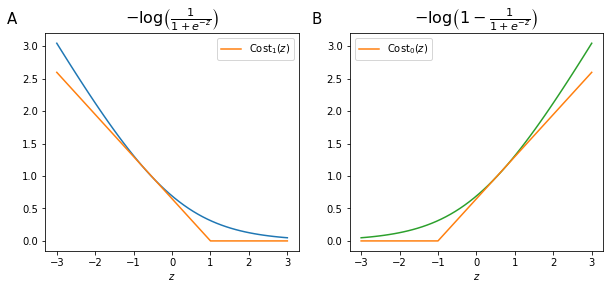

In [33]:
x = np.linspace(-3, 3)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(x, -np.log(logistic(x)))
ax1.set_title(r'$-\log \left(\frac{1}{1+e^{-z}} \right)$', fontsize=16)
ax1.plot([-3, 1, 3], [2.6, 0, 0], c='C1', label='Cost$_1(z)$')
ax2.plot(x, -np.log(1-logistic(x)), c='C2')
ax2.set_title(r'$-\log \left( 1-\frac{1}{1+e^{-z}}\right)$', fontsize=16)
ax2.plot([-3, -1, 3], [0, 0, 2.6], c='C1', label='Cost$_0(z)$')

for ax, label in zip([ax1, ax2], ["A", "B"]):
    ax.legend()
    ax.set_xlabel('$z$')
    ax.text(-0.15, 1.1, label, transform=ax.transAxes,
            fontsize=15, va='top')

<i id="costterm">Cost term for a single example in logistic regression as a function of $z$ in the cases of $y=1$ (A, blue) and $y=0$ (B); and their versions in an SVM (A, B, orange lines).</i>

So, where the optimization problem in logistic regression is:

$$
\min_\theta\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \left(- \log h_\theta(x^{(i)})\right) +(1-y^{(i)}) \cdot \left(-\log (1-h_\theta(x^{(i)}))\right) \right] + \frac{\lambda}{2m} \sum_{j=0}^n\theta_j^2
$$

By just substituting the $Cost_{0/1}$ terms, the optimization problem for an SVM would be:

$$
\begin{equation}
\min_\theta\color{red}{\frac{1}{m}}\sum_{i=1}^m \left[ y^{(i)} \text{ Cost}_1(\theta^Tx^{(i)}) + (1-y^{(i)}) \text{ Cost}_0(\theta^Tx^{(i)}) \right] + \frac{\color{magenta}{\lambda}}{2\color{red}{m}} \sum_{j=0}^n\theta_j^2
\end{equation}
$$

However we are going to slightly reparametrize it:

1. First we are going to get rid for the $\color{red}{\frac{1}{m}}$ term, as for the SVM the convention doesn't include this term. Since this term is a constant, we should end up with the same optimal value for $\theta$ if we  either include or remove it.
2. Second, we want to remove the regularization parameter $\color{magenta}{\lambda}$ in favor of another parameter that we can call $\color{magenta}{C}$. While in logistic regression we express the optimization problem in the form $A+\lambda B$, in SVM the form is $CA+B$, where $C$ can be thought as (but is not equivalent to) $\frac{1}{\lambda}$, in the sense that reducing $C$ has the effect of scaling down $A$ with respect to $B$.

With these two modifications we can now write the conventional form of the optimization problem for an SVM:

$$
\min_\theta C  \sum_{i=1}^m \left[y^{(i)} \text{ Cost}_1(\theta^Tx^{(i)}) + (1-y^{(i)}) \text{ Cost}_0(\theta^Tx^{(i)}) \right] + \frac{1}{2} \sum_{j=0}^n\theta_j^2
$$